
# Jordskjelvprogrammering i geofag 1

I dette opplegget tek me utgangspunkt i store mengdar ekte jordskjelvdata. Desse vil me systematisera og visualisera ved hjelp av biblioteket `geopandas` i Python :snake: <br> Døme på ein av figurane me kjem til å laga ser du under.

![:camera: Døme på figur](jordskjelv_stillehavet_djupne.png){fig-align="center" width="75%"}

:::{.callout-warning}
## Merk

For å gjennomføra denne øvinga treng ein biblioteket `geopandas`. Viss ein nyttar `anaconda` eller `miniconda` så er det enklaste å laga eit eige `enviroment` for å ikkje klussa til den «vanlege» python-installasjonen. Oppskrifta du finn [her](https://geopandas.org/en/stable/getting_started/install.html), funkar fint! 
:::

## Laste ned data

Først treng me eit datasett. USGS har ein eigen «jordskjelvkatalog» der ein kan søka etter og lasta ned jordskjelvdata. Katalogen finn du [her](https://earthquake.usgs.gov/earthquakes/search/). 

Det meste ein kan lasta ned er 20 000 jordskjelv, så me må gjera nokre val i innstillingane for å få dekka eit lengre tidsrom. 

**Basic options** <br>
**`Magnitude`** bør ha `Minimum` sett til 5,5. <br>
**`Date & Time`** sin `Start` bør vera så tidleg som mogleg (gjerne 1950 berre for å ta litt i...) <br>
**`Geographic Region`** står på `World`

**Output options** <br>
**`Format`** :arrow_right: `csv` <br>
**`Order By`** :arrow_right: `Time - Newest First` <br>
**`Limit Results`** bør ha `Number of Events` sett til 20000 (for å unngå feilmelding om for mange treff)

Den nedlasta fila bør ligga i same mappe som Jupyter-notatboka (eller `.py`-fila). For å gjera det enklare for oss sjølv kan me òg endra namn på fila til `skjelv.csv` eller liknande. 

:green_circle: Eg tilrår på det sterkaste å gjera denne type programmering/utforsking i ei Jupyter-notatbok

## Innlesing av data

Me startar med å importere naudsynte bibliotek.


In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

Bruker så `pandas` for å lesa inn `csv`-fila. 

In [2]:
skjelv = pd.read_csv("skjelv.csv")

Undersøker korleis den innleste tabellen ser ut

In [4]:
skjelv.shape

(20000, 22)

`(20000, 22)` betyr altså at me her har ein tabell med 20 000 rader og 22 kolonner. Ser på dei fem første radene i tabellen.

In [5]:
skjelv.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-24T20:00:55.086Z,-0.7810,98.5339,15.462,7.1,mww,70.0,58.0,2.282,0.91,...,2023-04-25T07:46:47.683Z,"170 km SSE of Teluk Dalam, Indonesia",earthquake,7.35,3.944,0.060,27.0,reviewed,us,us
1,2023-04-24T02:17:56.596Z,-60.3893,-26.1923,10.000,5.6,mb,80.0,68.0,19.029,0.60,...,2023-04-25T02:21:51.035Z,South Sandwich Islands region,earthquake,11.61,1.868,0.054,120.0,reviewed,us,us
2,2023-04-24T00:41:55.460Z,-29.9676,-177.8264,43.063,7.1,mww,126.0,23.0,0.708,0.50,...,2023-04-25T00:46:45.081Z,NaN,earthquake,8.37,4.305,0.048,42.0,reviewed,us,us
3,2023-04-22T21:17:45.986Z,-0.9589,98.4839,10.000,5.7,mww,124.0,53.0,2.424,0.74,...,2023-04-23T21:21:04.014Z,"170 km NW of Tuapejat, Indonesia",earthquake,7.18,1.806,0.060,27.0,reviewed,us,us
4,2023-04-22T17:09:45.448Z,-0.7645,98.5780,27.385,5.8,mww,178.0,34.0,2.286,0.80,...,2023-04-23T17:12:44.119Z,"Kepulauan Batu, Indonesia",earthquake,7.17,3.202,0.054,33.0,reviewed,us,us


Me kan sjå litt nærare på dei statistikk frå dei numeriske kolonnene med å bruka `describe()`

In [6]:
skjelv.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,20000.000000,20000.000000,20000.000000,20000.000000,7472.000000,10086.000000,4430.000000,19759.000000,3972.000000,7242.000000,3136.000000,4912.000000
mean,-0.308104,33.349754,70.485546,5.873034,267.023555,43.510441,4.347339,0.998922,7.115259,3.991525,0.059346,49.099959
std,30.063869,126.560024,127.629767,0.420587,160.409087,28.936826,5.492807,0.203466,2.309055,7.902934,0.031396,62.611998
min,-77.080000,-179.997000,-3.000000,5.500000,0.000000,8.000000,0.008000,0.040000,0.085000,0.000000,0.000000,0.000000
25%,-20.436500,-82.415450,10.000000,5.600000,138.000000,24.000000,1.167250,0.880000,5.800000,1.800000,0.046000,19.000000
50%,-4.496500,96.297000,31.700000,5.700000,242.000000,36.000000,2.535000,1.000000,7.100000,2.000000,0.055000,33.000000
75%,22.324750,143.512750,50.300000,6.000000,372.000000,54.000000,5.144000,1.110000,8.500000,4.400000,0.068000,56.250000
max,86.922900,179.998100,700.000000,9.100000,934.000000,313.000000,39.730000,2.820000,15.800000,569.200000,0.700000,941.000000


I kolonna `mag` (styrken) ser me at både gjennomsnittet (5,87) og medianen (5,7) er ganske låge. Hugs på at den lågaste verdien her er 5,5. Tala viser oss at 50% av dei 20000 skjelva er mellom 5,5 og 5,7 i styrke. Me ser òg at gjennomsnittsdjupna på skjelva er ca. 70,5 km (`depth`). 

Som me har sett over har tabellen mange kolonner, ikkje alle er like relevante for oss. Me kan sortera ut dei me treng vidare. Skriv først ut ei liste med kolonnenamn for å få oversikt over alle kolonnene.

In [7]:
skjelv.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

## Sortere i datamaterialet

Det første me gjer er å luka ut dei radene som ikkje er jordskjelv. I koden under tek me kun vare på dei radene der `type` er `earthquake`. 

In [8]:
skjelv = skjelv[skjelv["type"] == "earthquake"]
skjelv.shape

(19890, 22)

Me ser at tabellen vart nokre rader kortare. 

Plukker ut dei mest relevante kolonnene. Dato, lengde- og breddegrad, djupne og styrke:

In [9]:
skjelv = skjelv[["time", "latitude", "longitude", "depth", "mag"]]
skjelv.head()

,time,latitude,longitude,depth,mag
0,2023-04-24T20:00:55.086Z,-0.7810,98.5339,15.462,7.1
1,2023-04-24T02:17:56.596Z,-60.3893,-26.1923,10.000,5.6
2,2023-04-24T00:41:55.460Z,-29.9676,-177.8264,43.063,7.1
3,2023-04-22T21:17:45.986Z,-0.9589,98.4839,10.000,5.7
4,2023-04-22T17:09:45.448Z,-0.7645,98.5780,27.385,5.8


Sjekkar for ordens skuld kva tid det første skjelvet er frå. Ser på dei siste 5 radene i tabellen. 

In [17]:
skjelv.tail(5)

,time,latitude,longitude,depth,mag,geometry
19994,1982-08-06T20:46:13.910Z,-8.319,120.416,49.9,5.5,POINT (120.41600 -8.31900)
19995,1982-08-06T20:40:52.200Z,-8.375,120.577,45.7,5.9,POINT (120.57700 -8.37500)
19996,1982-08-05T20:42:07.300Z,-12.347,166.247,20.0,5.5,POINT (166.24700 -12.34700)
19997,1982-08-05T20:32:52.950Z,-12.597,165.931,30.7,7.0,POINT (165.93100 -12.59700)
19999,1982-08-05T07:28:08.810Z,-5.767,146.567,113.0,5.6,POINT (146.56700 -5.76700)


### Visuell oversikt over tabellen

For å sjå (og presentera) fordelinga av styrke og djupne kan me t.d. laga heilt enkle boksplot. Startar med eit for styrken :muscle: 

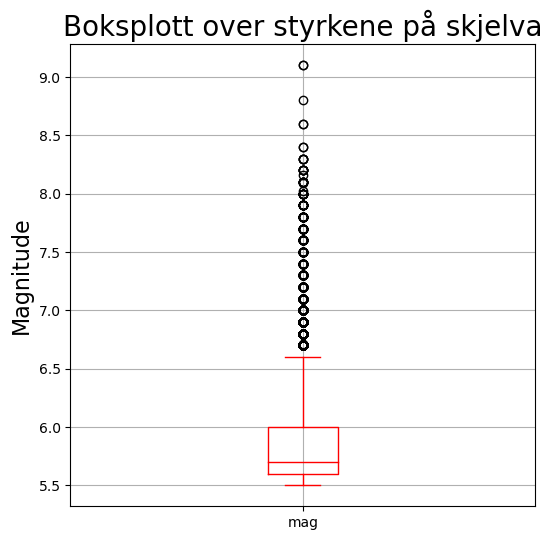

In [13]:
boksplot = skjelv.boxplot(column = "mag", figsize = (6,6), color = "red")
plt.title("Boksplott over styrkene på skjelva", fontsize = 20)
plt.ylabel("Magnitude", fontsize = 16)
plt.show()

Figuren her viser at jordskjelva i all hovudsak er mellom 5,5 og ca. 6,6. Dei sterkare skjelva er så få at dei vert sett på som avvik (*outliers*). 

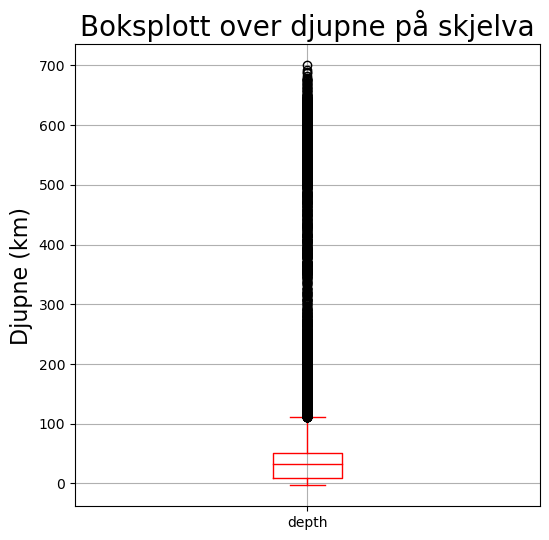

In [15]:
boksplot = skjelv.boxplot(column = "depth", figsize = (6,6), color = "red")
plt.title("Boksplott over djupne på skjelva", fontsize = 20)
plt.ylabel("Djupne (km)", fontsize = 16)
plt.show()

Figuren for djune viser oss at dei aller fleste skjelva er mellom 0 og 110 km djupe. 

:::{.callout-tip}
## Tips til meir visualisering :eyes: 

Det går an å prøva seg fram med ulike visualiseringar, feks. histogram/stolpediagram. Eventuelt kan ein sjekka ut `seaborn` [*dokumentasjon her*](https://seaborn.pydata.org) og laga enno fleire fancy figurar, feks. fiolinplot eller andre fine oversikter. 
:::

## GeoDataFrame

Først lagar me ei `geodataframe` frå vår opprinnelege `dataframe` (skjelv). Forskjellen på desse to er at førstnevnte har ei eigen kolonne `geometry`, som er punkt, linjer eller flater. I dette tilfelet punkt, som `geopandas` finn i lengde- og breiddegrad-kolonnene. 

In [16]:
skjelv_gdf = gpd.GeoDataFrame(
    skjelv, 
    geometry = gpd.points_from_xy(
        skjelv.longitude, 
        skjelv.latitude
        )
    )
skjelv_gdf.head()

,time,latitude,longitude,depth,mag,geometry
0,2023-04-24T20:00:55.086Z,-0.7810,98.5339,15.462,7.1,POINT (98.53390 -0.78100)
1,2023-04-24T02:17:56.596Z,-60.3893,-26.1923,10.000,5.6,POINT (-26.19230 -60.38930)
2,2023-04-24T00:41:55.460Z,-29.9676,-177.8264,43.063,7.1,POINT (-177.82640 -29.96760)
3,2023-04-22T21:17:45.986Z,-0.9589,98.4839,10.000,5.7,POINT (98.48390 -0.95890)
4,2023-04-22T17:09:45.448Z,-0.7645,98.5780,27.385,5.8,POINT (98.57800 -0.76450)


## Plotting

No er alt klart for å starta med plotting. Me lagar eit *basekart* av verda og plottar jordskjelva oppå dette. 

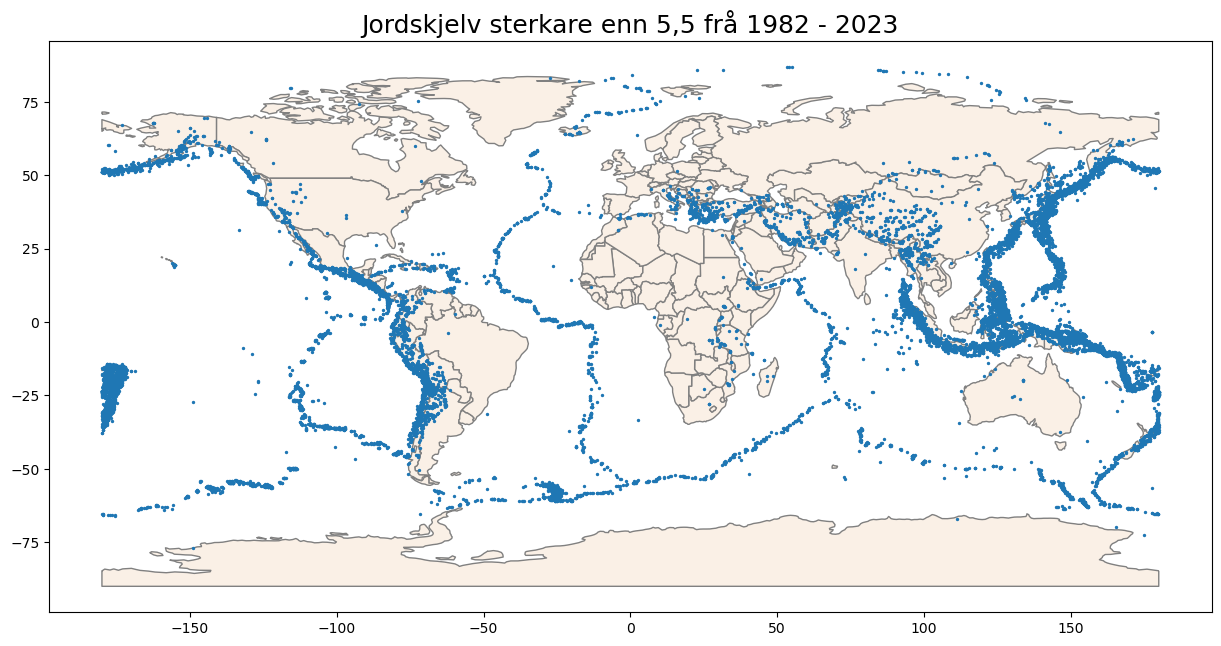

In [22]:
# bakgrunnskart - data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# plotte bakgrunnskart
base = world.plot(color = "linen", 
                  edgecolor = "gray", 
                  figsize = (15, 8)
                 )

skjelv_gdf.plot(ax = base, markersize = 2) 

plt.title("Jordskjelv sterkare enn 5,5 frå 1982 - 2023", fontsize = 18)
plt.show()

### Variable storleik på markørane

For å få fram ulikskapar mellom skjelva kan me plotta punkta slik at dei vert større di sterkare skjelva dei representerer er. Skjelva er frå 5.5 til 9.1 i styrke. Legg til ei ny kolonne i tabellen for storleik på markør. For at den skal gå frå 1 og oppover, trekk me 4,5 frå verdien til `mag`. 

In [41]:
skjelv_gdf["markør"] = skjelv_gdf["mag"] - 4.5
skjelv_gdf.head()

,time,latitude,longitude,depth,mag,geometry,markør
0,2023-04-24T20:00:55.086Z,-0.7810,98.5339,15.462,7.1,POINT (98.53390 -0.78100),2.6
1,2023-04-24T02:17:56.596Z,-60.3893,-26.1923,10.000,5.6,POINT (-26.19230 -60.38930),1.1
2,2023-04-24T00:41:55.460Z,-29.9676,-177.8264,43.063,7.1,POINT (-177.82640 -29.96760),2.6
3,2023-04-22T21:17:45.986Z,-0.9589,98.4839,10.000,5.7,POINT (98.48390 -0.95890),1.2
4,2023-04-22T17:09:45.448Z,-0.7645,98.5780,27.385,5.8,POINT (98.57800 -0.76450),1.3


Plottar på nytt. Merk at me endrar typen til `scatter` som gjer at markørstorleiken får eit anna argument `s` i staden for `markersize`. Prøv deg gjerne fram for å finna ein fin verdi for storleiken. Eg endte opp med `3*skjelv_gdf["markør"]**4`.

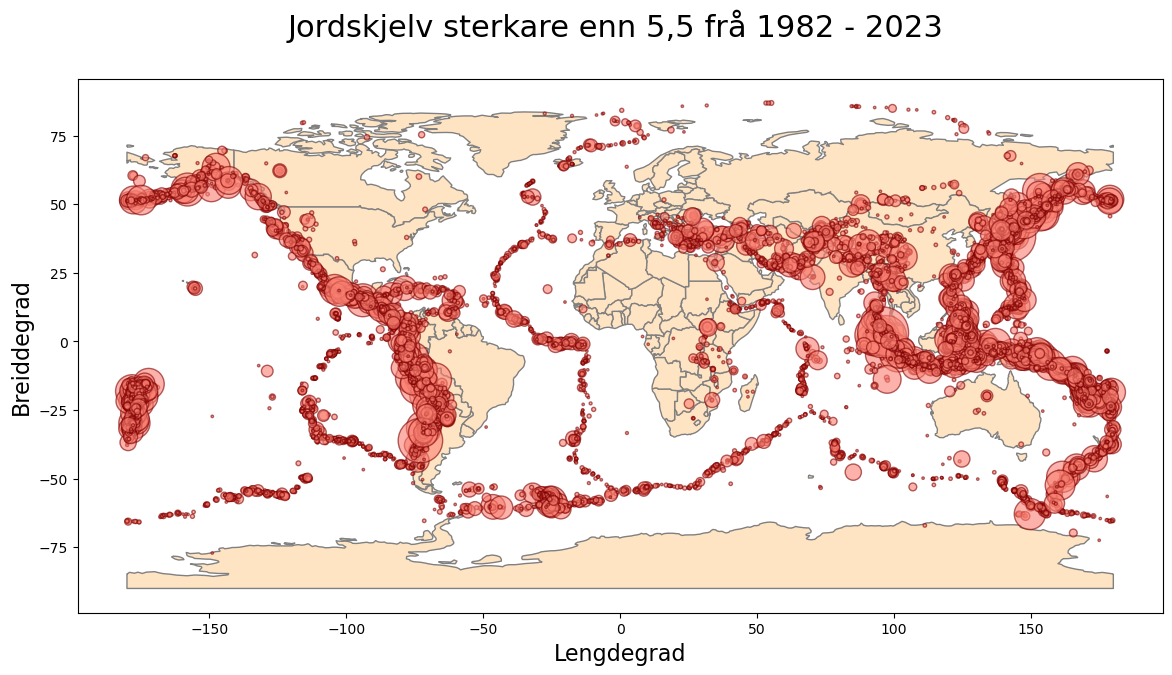

In [64]:
# bakgrunnskart
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

base = world.plot(color = "bisque", 
                  edgecolor = "gray", 
                  figsize = (14, 8)
                 )

# plottar skjelva
skjelv_gdf.plot(ax = base, 
                kind = "scatter", 
                x = "longitude", 
                y = "latitude",
                marker = "o",
                color = "salmon",
                s = 3*skjelv_gdf["markør"]**4, # størrelse på pkt. 
                edgecolor = "maroon",
                alpha = 0.6 # gjennomsiktighet
               )

plt.title("Jordskjelv sterkare enn 5,5 frå 1982 - 2023 \n", fontsize = 22)
plt.xlabel("Lengdegrad", fontsize = 16)
plt.ylabel("Breiddegrad", fontsize = 16)
#plt.savefig("jordskjelv_verda_styrke.png", dpi = 300) # <-- bruk denne for å lagra figuren
plt.show()

## Avgrense område

For å få betre oversikt kan me zooma inn på eit avgrensa område av jorda. Me kan t.d. sjå på områda rundt Indonesia. Les av omtrentlege lengde- og breddegrader på oversiktskartet. Legg avgrensingane inn som eigne variablar, slik at det er lett å endra dei seinare.

In [54]:
# Avgrensingar for rådata og kartplotting
lat_min = -25
lat_maks = 60
long_min = 80
long_maks = 170

Bruker vidare avgrensingane til å sortera ut ein eigen tabell med dei aktuelle skjelva. 

In [57]:
# lagar ny gdf til avgrensa område
område_skjelv = skjelv_gdf[(skjelv_gdf.latitude > lat_min) 
                           & (skjelv_gdf.latitude < lat_maks)
                           & (skjelv_gdf.longitude > long_min) 
                           & (skjelv_gdf.longitude < long_maks)
                          ]

område_skjelv.shape

(9302, 7)

Her ser me at me framleis har 9302 skjelv i tabellen, så omlag halvparten av dei 20 000 skjelva er frå det avgrensa området. 
Tar me ein kikk på dei 10 første linjene så ser me at indeksen ikkje er heilt i orden. 

In [59]:
område_skjelv.head(10)

,time,latitude,longitude,depth,mag,geometry,markør
0,2023-04-24T20:00:55.086Z,-0.7810,98.5339,15.462,7.1,POINT (98.53390 -0.78100),2.6
3,2023-04-22T21:17:45.986Z,-0.9589,98.4839,10.000,5.7,POINT (98.48390 -0.95890),1.2
4,2023-04-22T17:09:45.448Z,-0.7645,98.5780,27.385,5.8,POINT (98.57800 -0.76450),1.3
5,2023-04-22T09:15:54.527Z,-5.3425,125.6370,20.667,5.5,POINT (125.63700 -5.34250),1.0
6,2023-04-22T08:23:42.518Z,-5.2697,125.5950,7.270,6.0,POINT (125.59500 -5.26970),1.5
8,2023-04-21T10:21:13.739Z,2.7929,127.0480,24.575,5.9,POINT (127.04800 2.79290),1.4
10,2023-04-19T09:06:05.200Z,-5.9994,149.6062,55.674,6.3,POINT (149.60620 -5.99940),1.8
12,2023-04-18T02:40:53.003Z,54.1600,159.9190,110.846,5.6,POINT (159.91900 54.16000),1.1
13,2023-04-17T11:05:55.474Z,-4.8912,102.9538,58.386,5.5,POINT (102.95380 -4.89120),1.0
14,2023-04-15T15:07:06.934Z,-4.8648,102.9744,56.688,5.5,POINT (102.97440 -4.86480),1.0


Ikkje at det er veldig viktig no, men om me vil så kan me ordna dette lett. 

In [60]:
område_skjelv = område_skjelv.reset_index(drop=True)
område_skjelv.head(10)

,time,latitude,longitude,depth,mag,geometry,markør
0,2023-04-24T20:00:55.086Z,-0.7810,98.5339,15.462,7.1,POINT (98.53390 -0.78100),2.6
1,2023-04-22T21:17:45.986Z,-0.9589,98.4839,10.000,5.7,POINT (98.48390 -0.95890),1.2
2,2023-04-22T17:09:45.448Z,-0.7645,98.5780,27.385,5.8,POINT (98.57800 -0.76450),1.3
3,2023-04-22T09:15:54.527Z,-5.3425,125.6370,20.667,5.5,POINT (125.63700 -5.34250),1.0
4,2023-04-22T08:23:42.518Z,-5.2697,125.5950,7.270,6.0,POINT (125.59500 -5.26970),1.5
5,2023-04-21T10:21:13.739Z,2.7929,127.0480,24.575,5.9,POINT (127.04800 2.79290),1.4
6,2023-04-19T09:06:05.200Z,-5.9994,149.6062,55.674,6.3,POINT (149.60620 -5.99940),1.8
7,2023-04-18T02:40:53.003Z,54.1600,159.9190,110.846,5.6,POINT (159.91900 54.16000),1.1
8,2023-04-17T11:05:55.474Z,-4.8912,102.9538,58.386,5.5,POINT (102.95380 -4.89120),1.0
9,2023-04-15T15:07:06.934Z,-4.8648,102.9744,56.688,5.5,POINT (102.97440 -4.86480),1.0


### Plotte avgrensa område

No kan me plotta det avgrensa området. Bruker variablane med grensene for å tilpassa bakgrunnskartet. 

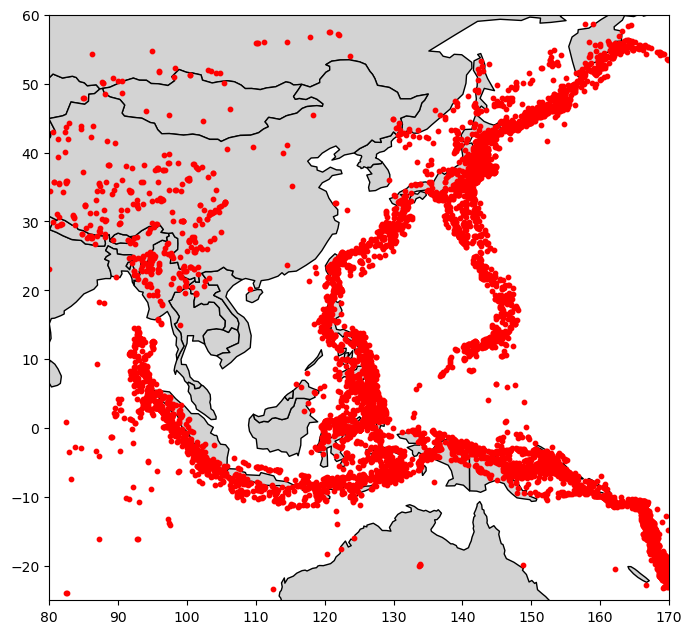

In [61]:
base = world.plot(color="lightgrey",
                  edgecolor="black", 
                  figsize=(8,10),
                 )

base.set_ylim([lat_min, lat_maks])
base.set_xlim([long_min, long_maks])

område_skjelv.plot(ax = base, 
                   color = "red",
                   markersize = 10
                  )

plt.show()

På denne figuren ser me at det er nokre område der skjelva dekker breiare linjer enn ellers. Prøver å få fram kor djupe dei ulike skjelva er. Me deler inn datamaterialet i grunne, middels og djupe skjelv, med 30 km og 300 km som grenser mellom dei tre kategoriane.

In [65]:
område_djup = område_skjelv[(område_skjelv.depth > 300)]
område_middels = område_skjelv[(område_skjelv.depth <= 300)
                               & (område_skjelv.depth > 30)]
område_grunn = område_skjelv[(område_skjelv.depth <= 30)]

Desse nye `gdf`-ane kan me plotta på oversiktskart over regionen:

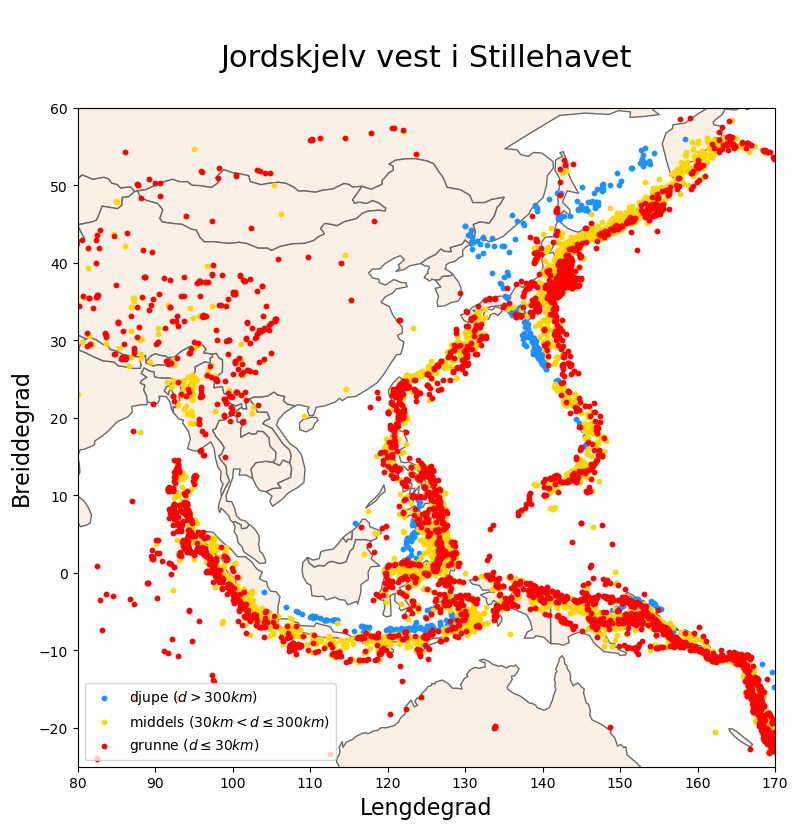

In [67]:
# bakgrunnskart
base = world.plot(color="linen",
                  edgecolor="dimgray", 
                  figsize=(9,9),
                 )

# avgrensing (til området)
base.set_ylim([lat_min, lat_maks])
base.set_xlim([long_min, long_maks])

# plotte skjelva
område_djup.plot(ax = base, color="dodgerblue", markersize=10)
område_middels.plot(ax = base, color="gold", markersize=10)
område_grunn.plot(ax = base, color="red", markersize=10)

# pynt
plt.title("\nJordskjelv vest i Stillehavet\n", fontsize = 22)
plt.xlabel("Lengdegrad", fontsize = 16)
plt.ylabel("Breiddegrad", fontsize = 16)
plt.legend(["djupe ($d > 300 km$)", 
           "middels ($30 km < d \leq 300 km$)",
           "grunne ($d \leq 30 km$)"
           ])
plt.savefig("jordskjelv_stillehavet_djupne.png", dpi=200, bbox_inches="tight")
plt.show()

Legg merke til $\LaTeX$-formateringa `middels ($30 km < d \leq 300 km$` i teiknforklaringa. 

:::{.callout-tip}
## Tips

Figurar som dei me har laga her, i sjølvvalde område, er supert utgangspunkt for vurdering (videopresentasjon, fagsamtale e.l.). Då kan elevane forklara kva dei ulike figurane viser, `kvifor` dei ser ut som dei gjer, og vidare gjera greie for aktuelle fagomgrep og prosessar knytt til dette. 

- Kva mønster ser du i styrken på skjelva? Kva kan vera årsaken til det?
- Kva mønster ser du i djupna på skjelva? Kva fortel det oss? Er det samanhengar mellom dei to figurane?
:::